Import basic standards

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Create Data: Scattered about a line with a slope of 0.5 and an intercept of -6. (Random observation to plot on graph)
Straight line fit model Y=mX+C, where m is the slope and C is the intercept.

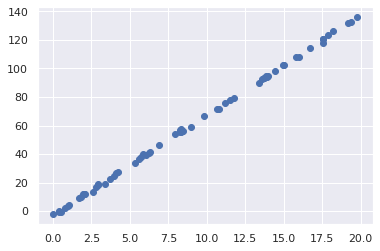

In [ ]:
rng = np.random.RandomState(1)
x = 20 * rng.rand(65)
y = 7 * x - 3 + rng.randn(65)
plt.scatter(x, y);

For the best fit line, I used "sklearn's linear regression". I'm making the line of best fit which is called the regression line.

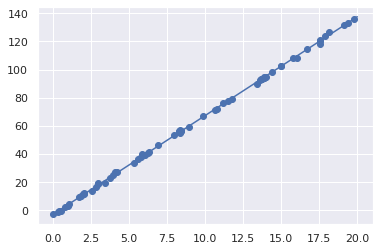

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 1100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Finding slope and intercept of the line using help of parameters. I'm using "coef_" and "intercept_" to estimate linear regression. This can also work with multi-dimensional linear models. (in my opinion, could be more accurate)

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     7.021379157487427
Model intercept: -2.897641189711287


 Relationship between x variable and y variable having a multi-dimensional model:

In [ ]:
rng = np.random.RandomState(1)
X = 20 * rng.rand(110, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000133
[ 1.5 -2.   1. ]


"PolynomialFeatures" transformer converting one dimensional array into a three dimensional array by taking the exponent of each value. Now this higher representation data can be plugged into a linear regression. Built into sklearn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 4, 5])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  1.,   1.,   1.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

 With this transform in place I can use the linear model to fit much more complicated relationships between x and y. In this we are making a seventh degree polynomial model.

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(8),
                           LinearRegression())

Now I'm making a nonliear graph with a random value to graph and attempt creating a graph with noise. This is a sine wave with noise and our linear model through the use of seventh order polynomial basis functions. Now there is an excellent fit to this nonlinear data.

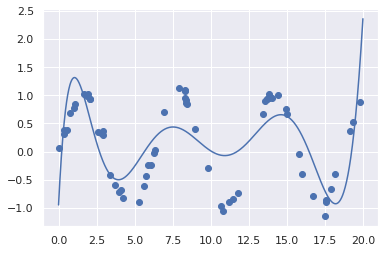

In [ ]:
rng = np.random.RandomState(1)
x = 20 * rng.rand(65)
y = np.sin(x) + 0.1 * rng.randn(65)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Sklearn transformers implemented as Python classes. These Gaussian basis functions are not built into sklearn. But I can write a custom transformer that will create them.

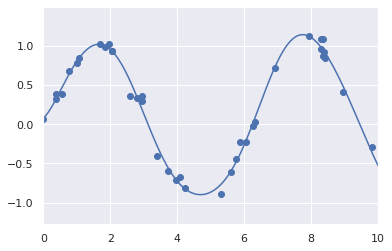

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Using regularization makes the graph in result have a distorted form, so not advisible to use Gaussian basis. Makes the model more flexible but it will have a bad impact on my graph. Here I'm trying to plot the coeffecients of the Gaussian basis with respect to their locations.

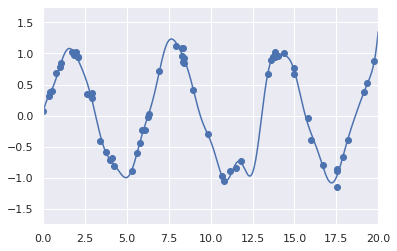

In [ ]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 20)
plt.ylim(-1.75, 1.75);

 Typical overfitting behavior when basis functions overlap. The coeffecients of adjacent basis functions blow up and cancel each other out

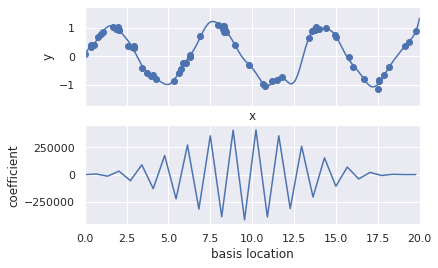

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.75, 1.75))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 20))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

^ Lower panel of figure shows the amplitude of the basis function at each "location.model" by penalizing large values of the model parameters. Which is known as regularization. There are several forms, I made two.

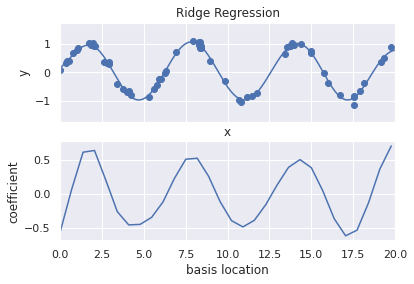

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

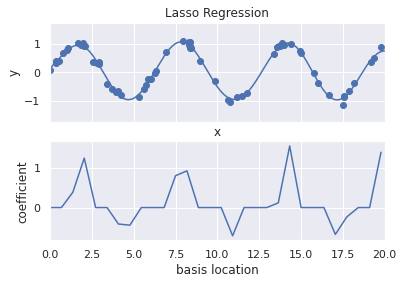

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')